# Tensorflow Ex-7 Part-2

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [16]:
x_data = np.linspace(0.0,10.0,1000000)

In [17]:
noise = np.random.randn(len(x_data))

In [18]:
x_data
noise

array([ 0.19417334, -0.00409685, -0.23223926, ...,  0.0918924 ,
        0.69141959,  0.47613011])

In [19]:
#y = mx + b, b = 5
y_true = (0.5 * x_data) + 5 + noise

In [20]:
x_df = pd.DataFrame(data = x_data, columns=['X_Data'])

In [21]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [22]:
x_df.head()
y_df.head()

Y
0  5.194173
1  4.995908
2  4.767771
3  4.457106
4  5.304095

In [23]:
my_data = pd.concat([x_df,y_df],axis=1)

In [24]:
my_data.head()

X_Data         Y
0  0.00000  5.194173
1  0.00001  4.995908
2  0.00002  4.767771
3  0.00003  4.457106
4  0.00004  5.304095

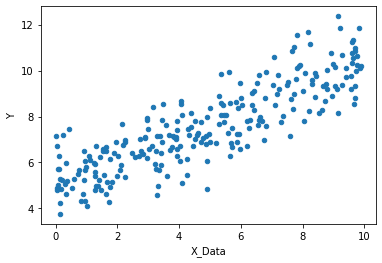

In [25]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')

In [26]:
batch_size = 8

In [27]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [28]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [29]:
#model
y_model = m*xph + b

In [30]:
#Cost Funtion
error = tf.reduce_sum(tf.square(yph-y_model))

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [32]:
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [34]:
model_m

0.52061284

In [35]:
model_b

5.0523634

In [ ]:
y_hat = x_data * model_m + model_b

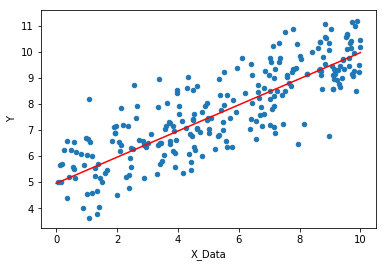

In [ ]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')
plt.plot(x_data,y_hat,'r')